In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<h3><ul>Basic Domain knowledge
    <li>mostly age of above 30</li>
    <li>based on gender </li>
    <li>based on region</li>
    <li> based policy channel availiable in that region </li>
    

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.shape,test.shape)

(304887, 12) (76222, 11)


In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,Male,50,1,41,0,1-2 Year,Yes,35915,124,240,0
1,239788,Female,48,1,28,0,1-2 Year,Yes,26873,124,274,0
2,348272,Female,34,1,41,0,1-2 Year,Yes,2630,156,138,1
3,73940,Female,43,1,28,0,1-2 Year,Yes,46877,124,223,0
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0


<h3>preproceesing

In [4]:
train['Gender']=train['Gender'].map({'Male':0,'Female':1})

In [5]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,0,50,1,41,0,1-2 Year,Yes,35915,124,240,0
1,239788,1,48,1,28,0,1-2 Year,Yes,26873,124,274,0
2,348272,1,34,1,41,0,1-2 Year,Yes,2630,156,138,1
3,73940,1,43,1,28,0,1-2 Year,Yes,46877,124,223,0
4,292871,0,29,1,28,1,< 1 Year,No,38009,152,106,0


In [6]:
train['Vehicle_Age'].unique()

array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object)

In [7]:
train['Vehicle_Age']=train['Vehicle_Age'].map({'1-2 Year':1,'< 1 Year':0,'> 2 Years':2})

In [8]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,0,50,1,41,0,1,Yes,35915,124,240,0
1,239788,1,48,1,28,0,1,Yes,26873,124,274,0
2,348272,1,34,1,41,0,1,Yes,2630,156,138,1
3,73940,1,43,1,28,0,1,Yes,46877,124,223,0
4,292871,0,29,1,28,1,0,No,38009,152,106,0


In [9]:
train['Vehicle_Damage']=train['Vehicle_Damage'].map({'Yes':1,'No':0})

In [10]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,0,50,1,41,0,1,1,35915,124,240,0
1,239788,1,48,1,28,0,1,1,26873,124,274,0
2,348272,1,34,1,41,0,1,1,2630,156,138,1
3,73940,1,43,1,28,0,1,1,46877,124,223,0
4,292871,0,29,1,28,1,0,0,38009,152,106,0


<h3>Feature Engineering

<h4>From which region and which policy channel responses are getting positive

In [11]:
pd.crosstab(train['Region_Code'],train['Response'])

Response,0,1
Region_Code,,
0,1491,142
1,710,92
2,2964,219
3,6457,963
4,1212,233
5,899,124
6,4646,349
7,2267,358
8,24683,2613


<h4> we can observe that from region code 46,41,29,28,8 we are getting more positive responses,So

In [12]:
train['imp_region']=train['Region_Code'].apply(lambda x:1 if x==46 or x==41 or x==29 or x==28 or x==8 else 0)

In [13]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,imp_region
0,350957,0,50,1,41,0,1,1,35915,124,240,0,1
1,239788,1,48,1,28,0,1,1,26873,124,274,0,1
2,348272,1,34,1,41,0,1,1,2630,156,138,1,1
3,73940,1,43,1,28,0,1,1,46877,124,223,0,1
4,292871,0,29,1,28,1,0,0,38009,152,106,0,1


<h4> Now check from which policy sales channel we are getting more positive responses

In [14]:
temp=pd.crosstab(train['Policy_Sales_Channel'],train['Response'])
temp.head()

Response,0,1
Policy_Sales_Channel,,
1,831,27
2,2,1
3,276,131
4,339,79
6,3,0


<h4>from channels 26,124,122,157,156,154,152 we getting maximum postive responses

In [15]:
train['imp_channel']=train['Policy_Sales_Channel'].apply(lambda x:1 if x==26 or x==124 or x==122 or x==157 or x==156 or x==154 or x==152 else 0)

In [16]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,imp_region,imp_channel
0,350957,0,50,1,41,0,1,1,35915,124,240,0,1,1
1,239788,1,48,1,28,0,1,1,26873,124,274,0,1,1
2,348272,1,34,1,41,0,1,1,2630,156,138,1,1,1
3,73940,1,43,1,28,0,1,1,46877,124,223,0,1,1
4,292871,0,29,1,28,1,0,0,38009,152,106,0,1,1


In [17]:
train['Gender_Age_prev']=train.groupby(['Gender','Age'])['Previously_Insured'].transform('count')
train['Gender_DL_prev']=train.groupby(['Gender','Driving_License'])['Previously_Insured'].transform('count')
train['gender_region_code_previoslyInsured']=train.groupby(['Gender','Region_Code'])['Previously_Insured'].transform('count')
train['gen_reg_channel_prev']=train.groupby(['Gender','Region_Code','Policy_Sales_Channel'])['Previously_Insured'].transform('count')

In [18]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,imp_region,imp_channel,Gender_Age_prev,Gender_DL_prev,gender_region_code_previoslyInsured,gen_reg_channel_prev
0,350957,0,50,1,41,0,1,1,35915,124,240,0,1,1,3299,164348,7808,1555
1,239788,1,48,1,28,0,1,1,26873,124,274,0,1,1,2085,139891,37065,8483
2,348272,1,34,1,41,0,1,1,2630,156,138,1,1,1,1762,139891,6813,171
3,73940,1,43,1,28,0,1,1,46877,124,223,0,1,1,2661,139891,37065,8483
4,292871,0,29,1,28,1,0,0,38009,152,106,0,1,1,2904,164348,47982,5054


In [19]:
temp=pd.crosstab(train['Age'],train['Response'])
temp[0:30]

Response,0,1
Age,,
20,4822,137
21,12741,463
22,16132,615
23,18677,704
24,20104,743
25,15921,586
26,10431,368
27,8246,371
28,6678,498


<h4>binning Age

In [20]:
train['Age_Group'] = train['Age'].apply(lambda x:0 if x<30 or x>60 else 1)

In [21]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,imp_region,imp_channel,Gender_Age_prev,Gender_DL_prev,gender_region_code_previoslyInsured,gen_reg_channel_prev,Age_Group
0,350957,0,50,1,41,0,1,1,35915,124,240,0,1,1,3299,164348,7808,1555,1
1,239788,1,48,1,28,0,1,1,26873,124,274,0,1,1,2085,139891,37065,8483,1
2,348272,1,34,1,41,0,1,1,2630,156,138,1,1,1,1762,139891,6813,171,1
3,73940,1,43,1,28,0,1,1,46877,124,223,0,1,1,2661,139891,37065,8483,1
4,292871,0,29,1,28,1,0,0,38009,152,106,0,1,1,2904,164348,47982,5054,0


In [22]:
train['Rank_regionwise_premium']=train.groupby(['Region_Code'])['Annual_Premium'].rank(method='first',ascending=True)
train['Rank_mean_regionwise_premium']=train.groupby(['Region_Code'])['Annual_Premium'].rank(method='average',ascending=True)
train['Rank_max_regionwise_premium']=train.groupby(['Region_Code'])['Annual_Premium'].rank(method='max',ascending=True)
train['Rank_min_regionwise_premium']=train.groupby(['Region_Code'])['Annual_Premium'].rank(method='min',ascending=True)
train['Rank_regionwise_diff']=train['Rank_max_regionwise_premium']- train['Rank_min_regionwise_premium']
train['Rank_channelwise_premium']=train.groupby(['Policy_Sales_Channel'])['Annual_Premium'].rank(method='first',ascending=True)
train['Rank_mean_channelwise_premium']=train.groupby(['Policy_Sales_Channel'])['Annual_Premium'].rank(method='average',ascending=True)
train['Rank_max_channelwise_premium']=train.groupby(['Policy_Sales_Channel'])['Annual_Premium'].rank(method='max',ascending=True)
train['Rank_min_channelwise_premium']=train.groupby(['Policy_Sales_Channel'])['Annual_Premium'].rank(method='min',ascending=True)
train['Rank_channelwise_diff']=train['Rank_max_channelwise_premium']- train['Rank_min_channelwise_premium']
train['Rank_Channel_wise_Vehicle_Age_Premium']=train.groupby(['Policy_Sales_Channel','Vehicle_Age'])['Annual_Premium'].rank(method='first',ascending=True)
train['Rank_Region_wise_Vehicle_Age_premium']=train.groupby(['Region_Code','Vehicle_Age'])['Annual_Premium'].rank(method='first',ascending=True)
train['Rank_Age_wise_premium']=train.groupby(['Age'])['Annual_Premium'].rank(method='first',ascending=True)

train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Rank_min_regionwise_premium,Rank_regionwise_diff,Rank_channelwise_premium,Rank_mean_channelwise_premium,Rank_max_channelwise_premium,Rank_min_channelwise_premium,Rank_channelwise_diff,Rank_Channel_wise_Vehicle_Age_Premium,Rank_Region_wise_Vehicle_Age_premium,Rank_Age_wise_premium
0,350957,0,50,1,41,0,1,1,35915,124,...,9885.0,3.0,35862.0,35862.5,35863.0,35862.0,1.0,32629.0,4486.0,2873.0
1,239788,1,48,1,28,0,1,1,26873,124,...,13202.0,0.0,16548.0,16549.0,16550.0,16548.0,2.0,15085.0,9915.0,1621.0
2,348272,1,34,1,41,0,1,1,2630,156,...,1.0,1749.0,1.0,3108.5,6216.0,1.0,6215.0,1.0,1.0,1.0
3,73940,1,43,1,28,0,1,1,46877,124,...,63366.0,1.0,51505.0,51505.5,51506.0,51505.0,1.0,46371.0,47641.0,5944.0
4,292871,0,29,1,28,1,0,0,38009,152,...,40480.0,3.0,83527.0,83527.5,83528.0,83527.0,1.0,77474.0,6969.0,4686.0


In [23]:
train['InsuranceLicense'] = train['Driving_License'].astype('str') + '' + train['Previously_Insured'].astype('str')
train['InsuranceGender'] = train['Gender'].astype('str') + '' + train['Previously_Insured'].astype('str')

In [24]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Rank_channelwise_premium,Rank_mean_channelwise_premium,Rank_max_channelwise_premium,Rank_min_channelwise_premium,Rank_channelwise_diff,Rank_Channel_wise_Vehicle_Age_Premium,Rank_Region_wise_Vehicle_Age_premium,Rank_Age_wise_premium,InsuranceLicense,InsuranceGender
0,350957,0,50,1,41,0,1,1,35915,124,...,35862.0,35862.5,35863.0,35862.0,1.0,32629.0,4486.0,2873.0,10,00
1,239788,1,48,1,28,0,1,1,26873,124,...,16548.0,16549.0,16550.0,16548.0,2.0,15085.0,9915.0,1621.0,10,10
2,348272,1,34,1,41,0,1,1,2630,156,...,1.0,3108.5,6216.0,1.0,6215.0,1.0,1.0,1.0,10,10
3,73940,1,43,1,28,0,1,1,46877,124,...,51505.0,51505.5,51506.0,51505.0,1.0,46371.0,47641.0,5944.0,10,10
4,292871,0,29,1,28,1,0,0,38009,152,...,83527.0,83527.5,83528.0,83527.0,1.0,77474.0,6969.0,4686.0,11,01


In [25]:
train['channel_wise_premium_max']=train.groupby(['Policy_Sales_Channel'])['Annual_Premium'].transform('max')
train['channel_wise_premium_min']=train.groupby(['Policy_Sales_Channel'])['Annual_Premium'].transform('min')
train['channel_wise_premium_mean']=train.groupby(['Policy_Sales_Channel'])['Annual_Premium'].transform('mean')
train['channel_wise_premium_sum']=train.groupby(['Policy_Sales_Channel'])['Annual_Premium'].transform('sum')

In [26]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Rank_channelwise_diff,Rank_Channel_wise_Vehicle_Age_Premium,Rank_Region_wise_Vehicle_Age_premium,Rank_Age_wise_premium,InsuranceLicense,InsuranceGender,channel_wise_premium_max,channel_wise_premium_min,channel_wise_premium_mean,channel_wise_premium_sum
0,350957,0,50,1,41,0,1,1,35915,124,...,1.0,32629.0,4486.0,2873.0,10,00,540165,2630,31737.751462,1877922754
1,239788,1,48,1,28,0,1,1,26873,124,...,2.0,15085.0,9915.0,1621.0,10,10,540165,2630,31737.751462,1877922754
2,348272,1,34,1,41,0,1,1,2630,156,...,6215.0,1.0,1.0,1.0,10,10,540165,2630,11350.018299,96758906
3,73940,1,43,1,28,0,1,1,46877,124,...,1.0,46371.0,47641.0,5944.0,10,10,540165,2630,31737.751462,1877922754
4,292871,0,29,1,28,1,0,0,38009,152,...,1.0,77474.0,6969.0,4686.0,11,01,495106,2630,30868.210325,3326420081


In [27]:
train['region_wise_premium_max']=train.groupby(['Region_Code'])['Annual_Premium'].transform('max')
train['region_wise_premium_min']=train.groupby(['Region_Code'])['Annual_Premium'].transform('min')
train['region_wise_premium_mean']=train.groupby(['Region_Code'])['Annual_Premium'].transform('mean')
train['region_wise_premium_sum']=train.groupby(['Region_Code'])['Annual_Premium'].transform('sum')

In [28]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,InsuranceLicense,InsuranceGender,channel_wise_premium_max,channel_wise_premium_min,channel_wise_premium_mean,channel_wise_premium_sum,region_wise_premium_max,region_wise_premium_min,region_wise_premium_mean,region_wise_premium_sum
0,350957,0,50,1,41,0,1,1,35915,124,...,10,00,540165,2630,31737.751462,1877922754,339396,2630,30848.541481,451036525
1,239788,1,48,1,28,0,1,1,26873,124,...,10,10,540165,2630,31737.751462,1877922754,540165,2630,38675.318977,3289219853
2,348272,1,34,1,41,0,1,1,2630,156,...,10,10,540165,2630,11350.018299,96758906,339396,2630,30848.541481,451036525
3,73940,1,43,1,28,0,1,1,46877,124,...,10,10,540165,2630,31737.751462,1877922754,540165,2630,38675.318977,3289219853
4,292871,0,29,1,28,1,0,0,38009,152,...,11,01,495106,2630,30868.210325,3326420081,540165,2630,38675.318977,3289219853


In [29]:
train.dtypes

id                                         int64
Gender                                     int64
Age                                        int64
Driving_License                            int64
Region_Code                                int64
Previously_Insured                         int64
Vehicle_Age                                int64
Vehicle_Damage                             int64
Annual_Premium                             int64
Policy_Sales_Channel                       int64
Vintage                                    int64
Response                                   int64
imp_region                                 int64
imp_channel                                int64
Gender_Age_prev                            int64
Gender_DL_prev                             int64
gender_region_code_previoslyInsured        int64
gen_reg_channel_prev                       int64
Age_Group                                  int64
Rank_regionwise_premium                  float64
Rank_mean_regionwise

In [30]:
X=train.drop(['Response'],axis=1)
y=train['Response']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<h3>feature selection
    <ul><li>1.Using Variance Threshold

In [31]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(0.0)
selector.fit(x_train)
print(selector.get_support())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True]


In [32]:
#we can observe two false over there so remove them where the variance is zero
constant_columns=[column for column in x_train.columns if column not in x_train.columns[selector.get_support()]]

In [33]:
constant_columns

['region_wise_premium_min']

In [34]:
#drop 'region_wise_premium_min'
x_train=x_train.drop(['region_wise_premium_min'],axis=1)
x_test=x_test.drop(['region_wise_premium_min'],axis=1)

In [35]:
x_train.shape

(243909, 40)

In [36]:
x_test.shape

(60978, 40)

<h3> using pearson correclation to eliminate features

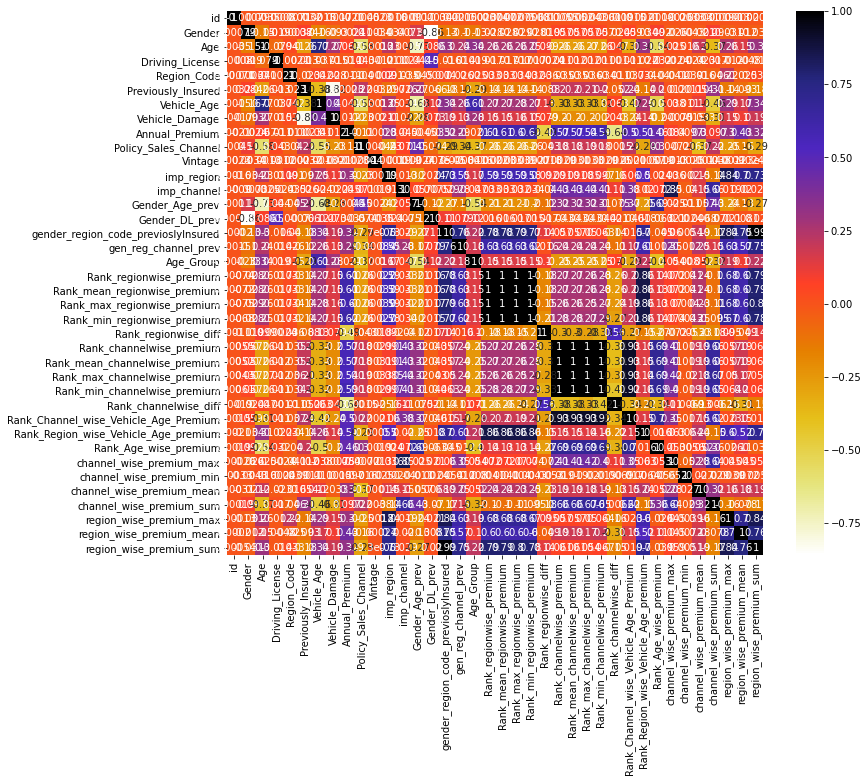

In [144]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [37]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
cols=correlation(x_train,0.9)
len(set(cols))

8

In [39]:
cols

{'Rank_Channel_wise_Vehicle_Age_Premium',
 'Rank_max_channelwise_premium',
 'Rank_max_regionwise_premium',
 'Rank_mean_channelwise_premium',
 'Rank_mean_regionwise_premium',
 'Rank_min_channelwise_premium',
 'Rank_min_regionwise_premium',
 'region_wise_premium_sum'}

In [40]:
x_train.drop(cols,axis=1,inplace=True)
x_test.drop(cols,axis=1,inplace=True)

In [41]:
print(x_train.shape,x_test.shape)

(243909, 32) (60978, 32)


<h3>3.Using Information Gain and select-k best method

In [42]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#No we Will select the  top 10 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

<h3>Due to memory issue cant run above lines of code(Loc)

In [ ]:
x_train.drop(['id'],axis=1,inplace=True)

<h3>CHI2 TEST

In [52]:
from sklearn.feature_selection import chi2
f_p_values=chi2(x_train,y_train)

In [53]:
f_p_values

(array([3.82690080e+02, 1.84926825e+04, 6.04130908e-02, 1.26830383e+02,
        1.53430123e+04, 6.32349039e+03, 1.51789510e+04, 1.23959897e+06,
        1.21350435e+05, 3.86916460e-02, 9.46460163e+02, 4.48934197e+01,
        1.34136198e+07, 8.66043459e+05, 7.40890513e+07, 1.88513287e+07,
        6.13550616e+03, 7.66364953e+07, 8.48644575e+05, 4.61996733e+07,
        3.50374820e+04, 4.35180069e+07, 1.15477771e+07, 6.35398422e+02,
        9.27071640e+03, 1.38533727e+07, 8.18166585e+01, 1.91275838e+02,
        3.16879161e+12, 3.63193005e+08, 2.74541884e+06]),
 array([3.23067904e-085, 0.00000000e+000, 8.05844221e-001, 2.02349199e-029,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 8.44060806e-001, 7.80221827e-208, 2.08055872e-011,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,

In [54]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=x_train.columns
p_values

Gender                                   3.230679e-85
Age                                      0.000000e+00
Driving_License                          8.058442e-01
Region_Code                              2.023492e-29
Previously_Insured                       0.000000e+00
Vehicle_Age                              0.000000e+00
Vehicle_Damage                           0.000000e+00
Annual_Premium                           0.000000e+00
Policy_Sales_Channel                     0.000000e+00
Vintage                                  8.440608e-01
imp_region                              7.802218e-208
imp_channel                              2.080559e-11
Gender_Age_prev                          0.000000e+00
Gender_DL_prev                           0.000000e+00
gender_region_code_previoslyInsured      0.000000e+00
gen_reg_channel_prev                     0.000000e+00
Age_Group                                0.000000e+00
Rank_regionwise_premium                  0.000000e+00
Rank_regionwise_diff        

In [55]:
p_values.sort_index(ascending=False)

region_wise_premium_mean                 0.000000e+00
region_wise_premium_max                  0.000000e+00
imp_region                              7.802218e-208
imp_channel                              2.080559e-11
gender_region_code_previoslyInsured      0.000000e+00
gen_reg_channel_prev                     0.000000e+00
channel_wise_premium_sum                 0.000000e+00
channel_wise_premium_min                 1.493147e-19
channel_wise_premium_mean                1.674356e-43
channel_wise_premium_max                 0.000000e+00
Vintage                                  8.440608e-01
Vehicle_Damage                           0.000000e+00
Vehicle_Age                              0.000000e+00
Region_Code                              2.023492e-29
Rank_regionwise_premium                  0.000000e+00
Rank_regionwise_diff                     0.000000e+00
Rank_channelwise_premium                 0.000000e+00
Rank_channelwise_diff                    0.000000e+00
Rank_Region_wise_Vehicle_Age

<h3>selecting most important features with respect to model performances

In [60]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier

In [61]:
X = x_train
y = y_train

In [67]:
x_test.drop(['id'],axis=1,inplace=True)

In [68]:
n_feat = [8,10,12,15,20]
for n in n_feat:
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(y_test, rfe.predict(x_test)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
0.8777289890901935
0.0
['Policy_Sales_Channel' 'Vintage' 'Gender_Age_prev' 'gen_reg_channel_prev'
 'Rank_regionwise_diff' 'Rank_Age_wise_premium' 'channel_wise_premium_min'
 'channel_wise_premium_mean'] 

Top features:  10
0.8777289890901935
0.0
['Policy_Sales_Channel' 'Vintage' 'Gender_Age_prev' 'gen_reg_channel_prev'
 'Rank_regionwise_diff' 'Rank_channelwise_premium'
 'Rank_Region_wise_Vehicle_Age_premium' 'Rank_Age_wise_premium'
 'channel_wise_premium_min' 'channel_wise_premium_mean'] 

Top features:  12
0.8777289890901935
0.0
['Policy_Sales_Channel' 'Vintage' 'Gender_Age_prev' 'gen_reg_channel_prev'
 'Rank_regionwise_premium' 'Rank_regionwise_diff'
 'Rank_channelwise_premium' 'Rank_channelwise_diff'
 'Rank_Region_wise_Vehicle_Age_premium' 'Rank_Age_wise_premium'
 'channel_wise_premium_min' 'channel_wise_premium_mean'] 

Top features:  15
0.8775075950456933
0.0005334044539271903
['Policy_Sales_Channel' 'Vintage' 'Gender_Age_prev' 'Gender_DL_prev'
 'gen_reg_channel_p

In [ ]:
n_feat = [8,10,12,15,20]
for n in n_feat:
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(y_test, rfe.predict(x_test)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
0.9999795005514351
0.13308647353517752
['Age' 'Vehicle_Damage' 'Annual_Premium' 'Vintage'
 'Rank_regionwise_premium' 'Rank_channelwise_premium'
 'Rank_Region_wise_Vehicle_Age_premium' 'Rank_Age_wise_premium'] 

Top features:  10
0.9999795005514351
0.13692456272132203
['Age' 'Vehicle_Damage' 'Annual_Premium' 'Vintage' 'Gender_Age_prev'
 'gen_reg_channel_prev' 'Rank_regionwise_premium'
 'Rank_channelwise_premium' 'Rank_Region_wise_Vehicle_Age_premium'
 'Rank_Age_wise_premium'] 

Top features:  12
0.9999836004411481
0.13769995676610464
['Age' 'Previously_Insured' 'Vehicle_Damage' 'Annual_Premium' 'Vintage'
 'Gender_Age_prev' 'gen_reg_channel_prev' 'Rank_regionwise_premium'
 'Rank_regionwise_diff' 'Rank_channelwise_premium'
 'Rank_Region_wise_Vehicle_Age_premium' 'Rank_Age_wise_premium'] 



In [ ]:
n_feat = [6,7,8,10,12,15]
for n in n_feat:
    model = DecisionTreeClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(y_test, rfe.predict(x_test)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

In [ ]:
n_feat = [8,10,12,15,20]
for n in n_feat:
    model = AdaBoostClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(y_test, rfe.predict(x_test)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(ytest, ypred)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.figure()
plt.plot(fpr, tpr, label='Adaptive Boosting Classifier (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()